In [77]:
import psycopg2 as ps #config
import pandas as pd #compile
import matplotlib.pyplot as plt #scatter plot, line plot, bar plot dan histogram
import seaborn as sns #heatmap

In [78]:
conn2 = ps.connect(dbname = "morpheus_bookstore",
                   user = "postgres",
                   password = "280823",
                   host = "localhost",
                   port = "5432")

#Untuk pembuatan grafik code nya gak bisa dipisah harus jadi satu kalo gak nanti grafiknya misah

1. Membuat scatter plot yang menunjukkan hubungan antara harga buku dan jumlah buku yang terjual.

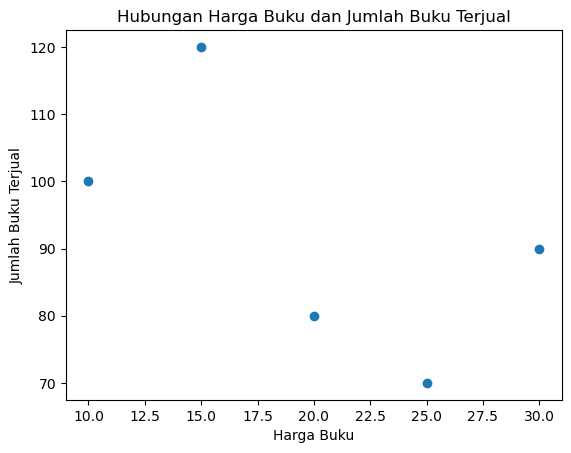

In [79]:
# Membuat DataFrame dummy untuk scatter plot
data = {'price': [10, 20, 15, 25, 30],
        'quantity': [100, 80, 120, 70, 90]}
df = pd.DataFrame(data)

# Membuat scatter plot
plt.scatter(df['price'], df['quantity'])
plt.xlabel('Harga Buku')
plt.ylabel('Jumlah Buku Terjual')
plt.title('Hubungan Harga Buku dan Jumlah Buku Terjual')
plt.show()

2. Membuat line plot yang menunjukkan tren penjualan bulanan selama beberapa bulan terakhir.

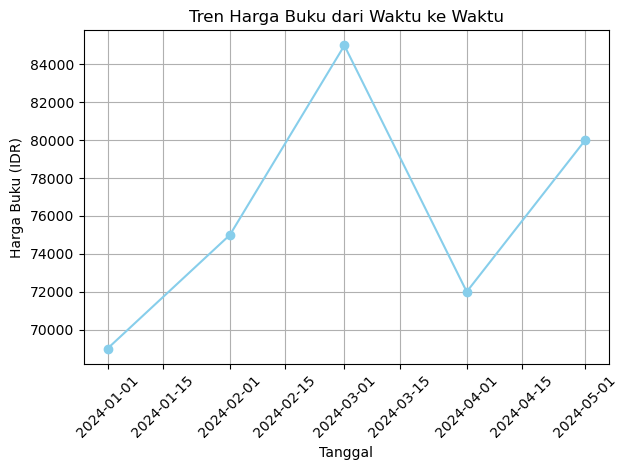

In [80]:
# Data harga buku dari waktu ke waktu
harga_buku = {
    'tanggal': ['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01'],
    'harga': [69000, 75000, 85000, 72000, 80000]
}

# Membuat DataFrame dari data harga buku
df_harga_buku = pd.DataFrame(harga_buku)
df_harga_buku['tanggal'] = pd.to_datetime(df_harga_buku['tanggal'])  # Mengubah kolom 'tanggal' menjadi tipe data datetime

# Membuat line plot
plt.plot(df_harga_buku['tanggal'], df_harga_buku['harga'], marker='o', color='skyblue', linestyle='-')

# Memberikan judul dan label sumbu
plt.title('Tren Harga Buku dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Harga Buku (IDR)')

# Menampilkan plot
plt.xticks(rotation=45)  # Rotasi label sumbu x agar lebih mudah dibaca
plt.grid(True)  # Menampilkan grid
plt.tight_layout()  # Mengoptimalkan tata letak plot
plt.show()


3. Membuat bar plot yang menampilkan total penjualan untuk setiap genre buku.

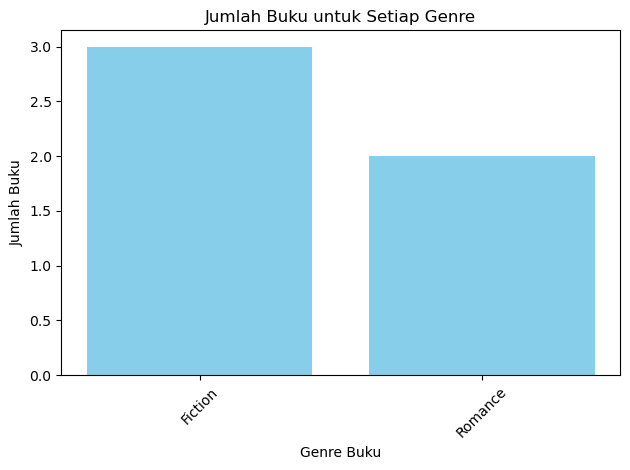

In [81]:
# Data buku dari tabel master_books
data = {
    'book_title': ['Laskar Pelangi', 'Negeri 5 Menara', 'Ayat-Ayat Cinta', 'Sang Pemimpi', 'Ketika Cinta Bertasbih'],
    'author': ['Andrea Hirata', 'Ahmad Fuadi', 'Habiburrahman El Shirazy', 'Andrea Hirata', 'Habiburrahman El Shirazy'],
    'genre': ['Fiction', 'Fiction', 'Romance', 'Fiction', 'Romance'],
    'price': [69000, 75000, 85000, 72000, 80000]
}

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Menghitung jumlah buku untuk setiap genre
genre_counts = df['genre'].value_counts()

# Membuat bar plot
plt.bar(genre_counts.index, genre_counts.values, color='skyblue')

# Memberikan judul dan label sumbu
plt.title('Jumlah Buku untuk Setiap Genre')
plt.xlabel('Genre Buku')
plt.ylabel('Jumlah Buku')

# Menampilkan plot
plt.xticks(rotation=45)  # Rotasi label sumbu x agar lebih mudah dibaca
plt.tight_layout()  # Mengoptimalkan tata letak plot
plt.show()


4. Membuat histogram yang menunjukkan distribusi usia pelanggan.

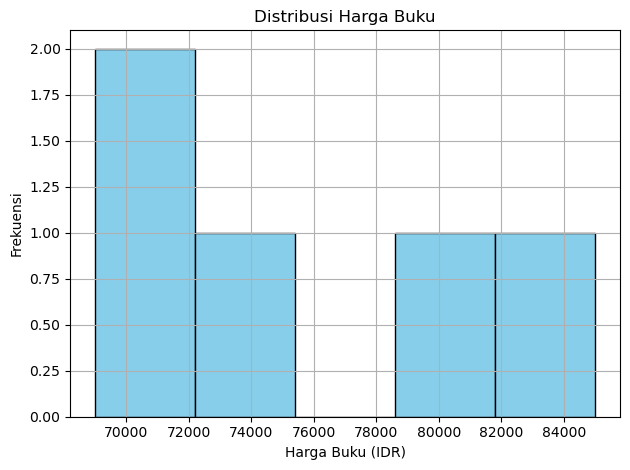

In [82]:
# Data harga buku dari master_books
data = {
    'book_title': ['Laskar Pelangi', 'Negeri 5 Menara', 'Ayat-Ayat Cinta', 'Sang Pemimpi', 'Ketika Cinta Bertasbih'],
    'author': ['Andrea Hirata', 'Ahmad Fuadi', 'Habiburrahman El Shirazy', 'Andrea Hirata', 'Habiburrahman El Shirazy'],
    'genre': ['Fiction', 'Fiction', 'Romance', 'Fiction', 'Romance'],
    'price': [69000, 75000, 85000, 72000, 80000]
}

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Membuat histogram untuk distribusi harga buku
plt.hist(df['price'], bins=5, color='skyblue', edgecolor='black')

# Memberikan judul dan label sumbu
plt.title('Distribusi Harga Buku')
plt.xlabel('Harga Buku (IDR)')
plt.ylabel('Frekuensi')

# Menampilkan plot
plt.grid(True)  # Menampilkan grid
plt.tight_layout()  # Mengoptimalkan tata letak plot
plt.show()

5. Membuat heatmap yang menunjukkan pola penjualan buku berdasarkan hari dalam seminggu dan jam dalam sehari.

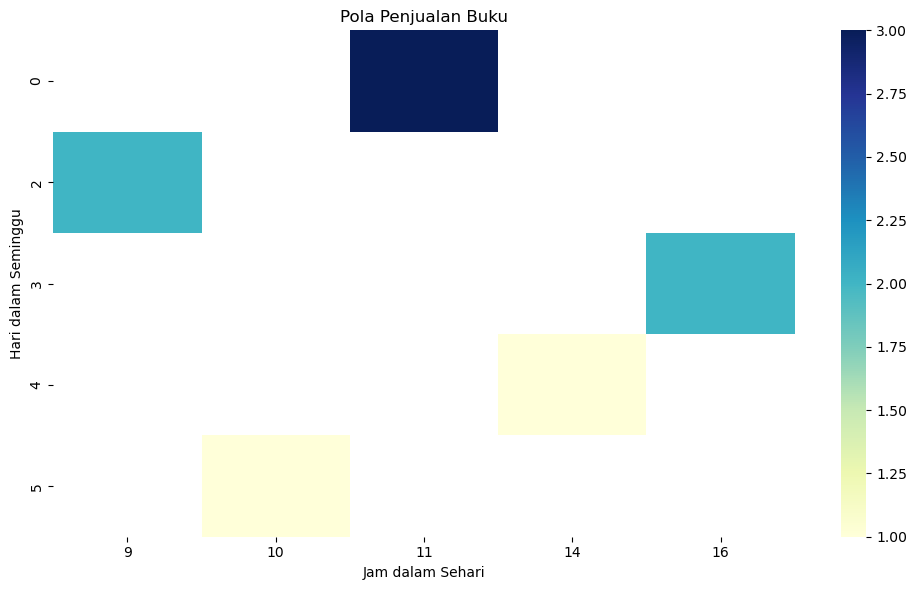

In [83]:
# Data transaksi dari tabel transactions
data = {
    'transaction_id': [1, 2, 3, 4, 5],
    'book_id': [1, 2, 3, 4, 5],
    'customer_id': [101, 102, 103, 104, 105],
    'transaction_date': ['2024-01-10 09:30:00', '2024-01-12 14:45:00', '2024-01-15 11:20:00', '2024-01-18 16:10:00', '2024-01-20 10:00:00'],
    'quantity': [2, 1, 3, 2, 1]
}

# Membuat DataFrame dari data transaksi
df = pd.DataFrame(data)
df['transaction_date'] = pd.to_datetime(df['transaction_date'])  # Mengubah kolom 'transaction_date' menjadi tipe data datetime
df['day_of_week'] = df['transaction_date'].dt.dayofweek  # Mendapatkan hari dalam seminggu (Senin=0, Minggu=6)
df['hour_of_day'] = df['transaction_date'].dt.hour  # Mendapatkan jam dalam sehari

# Agregasi jumlah penjualan berdasarkan hari dalam seminggu dan jam dalam sehari
sales_heatmap = df.groupby(['day_of_week', 'hour_of_day'])['quantity'].sum().unstack()

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sales_heatmap, cmap='YlGnBu')

# Memberikan judul dan label sumbu
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Hari dalam Seminggu')
plt.title('Pola Penjualan Buku')

# Menampilkan plot
plt.tight_layout()
plt.show()